https://huggingface.co/docs/transformers/model_doc/chinese_clip

In [1]:
import torch
from transformers import ChineseCLIPModel, ChineseCLIPProcessor
from PIL import Image
import requests

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
version = "OFA-Sys/chinese-clip-vit-base-patch16"
url = "https://clip-cn-beijing.oss-cn-beijing.aliyuncs.com/pokemon.jpeg"
text = ["杰尼龟", "妙蛙种子", "小火龙", "皮卡丘"]

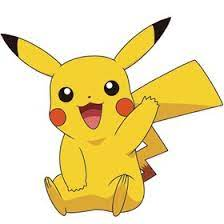

In [4]:
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')
image

# ChineseCLIPProcessor

In [5]:
processor: ChineseCLIPProcessor = ChineseCLIPProcessor.from_pretrained(version)
processor

ChineseCLIPProcessor:
- image_processor: ChineseCLIPImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": false,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "ChineseCLIPFeatureExtractor",
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "ChineseCLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

- tokenizer: BertTokenizerFast(name_or_path='OFA-Sys/chinese-clip-vit-base-patch16', vocab_size=21128, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_to

## processor

In [6]:
inputs = processor(
    text = text,                # 可以为列表或单个string
    images = image,             # 可以为列表或单张图片
    return_tensors = "pt",      # 返回数据格式 np pt tf jax
    padding = True,             # 填充方式选择 [True, 'longest', 'max_length', 'do_not_pad']
    # max_length = max_length,  # 如果使用max_length要将padding设置为 "max_length"
    add_special_tokens = True,  # text添加特殊key
).to(device, torch.float16)
inputs

{'input_ids': tensor([[ 101, 3345, 2225, 7991,  102,    0],
        [ 101, 1975, 6032, 4905, 2094,  102],
        [ 101, 2207, 4125, 7987,  102,    0],
        [ 101, 4649, 1305,  687,  102,    0]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0]], device='cuda:0'), 'pixel_values': tensor([[[[1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          ...,
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303]],

         [[2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749,

In [7]:
inputs["input_ids"]

tensor([[ 101, 3345, 2225, 7991,  102,    0],
        [ 101, 1975, 6032, 4905, 2094,  102],
        [ 101, 2207, 4125, 7987,  102,    0],
        [ 101, 4649, 1305,  687,  102,    0]], device='cuda:0')

In [8]:
inputs["pixel_values"].shape

torch.Size([1, 3, 224, 224])

# ChineseCLIPModel

In [9]:
model: ChineseCLIPModel = ChineseCLIPModel.from_pretrained(version, torch_dtype=torch.float16).to(device)
model

ChineseCLIPModel(
  (text_model): ChineseCLIPTextModel(
    (embeddings): ChineseCLIPTextEmbeddings(
      (word_embeddings): Embedding(21128, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ChineseCLIPTextEncoder(
      (layer): ModuleList(
        (0-11): 12 x ChineseCLIPTextLayer(
          (attention): ChineseCLIPTextAttention(
            (self): ChineseCLIPTextSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ChineseCLIPTextSelfOutput(
              (dense): Linear(in_features=768, out_features=7

In [10]:
model.eval()
with torch.inference_mode():
    outputs = model(**inputs)
outputs

ChineseCLIPOutput(loss=None, logits_per_image=tensor([[40.7611, 44.5213, 40.1370, 47.3728]], device='cuda:0'), logits_per_text=tensor([[40.7611],
        [44.5213],
        [40.1370],
        [47.3728]], device='cuda:0'), text_embeds=tensor([[ 0.1175, -0.0164,  0.0040,  ...,  0.0346,  0.0658, -0.0064],
        [ 0.1009, -0.0083, -0.0572,  ...,  0.0055,  0.0452,  0.0021],
        [ 0.0874, -0.0272, -0.0229,  ...,  0.0087, -0.0080, -0.0668],
        [ 0.1200, -0.0092, -0.0349,  ...,  0.0019, -0.0037, -0.0151]],
       device='cuda:0'), image_embeds=tensor([[ 9.3172e-02, -3.8376e-02,  1.4969e-02,  7.1487e-03, -2.9734e-02,
          2.8158e-02,  5.9056e-03,  3.6028e-02,  1.1762e-02, -8.6957e-03,
          2.9249e-04, -2.6997e-02,  2.7959e-02, -6.4963e-03, -4.2305e-03,
         -2.8661e-03,  1.2199e-02, -1.3076e-02,  2.1067e-02,  4.9603e-04,
         -3.0599e-02,  3.4886e-02,  4.5724e-02, -1.1882e-02,  7.6160e-03,
          2.9868e-02, -4.9289e-02,  6.7808e-02,  2.7466e-02,  2.6390e-02,
   

In [11]:
print(outputs.text_embeds.shape)    # The text embeddings obtained by applying the projection layer to the pooled output of ChineseCLIPTextModel.
print(outputs.image_embeds.shape)   # The image embeddings obtained by applying the projection layer to the pooled output of ChineseCLIPVisionModel.
# 是 ChineseCLIPProcessor 的输出结果
print(outputs.text_model_output.last_hidden_state.shape)
# print(outputs.text_model_output.pooler_output.shape)
# 是 ChineseCLIPVisionModel 的输出结果
print(outputs.vision_model_output.last_hidden_state.shape)
print(outputs.vision_model_output.pooler_output.shape)

torch.Size([4, 512])
torch.Size([1, 512])
torch.Size([4, 6, 768])
torch.Size([1, 197, 768])
torch.Size([1, 768])


## logits_per_image 文本对图片的分类

In [12]:
outputs.logits_per_image

tensor([[40.7611, 44.5213, 40.1370, 47.3728]], device='cuda:0')

In [13]:
outputs.logits_per_image.softmax(dim=-1)

tensor([[1.2686e-03, 5.4498e-02, 6.7969e-04, 9.4355e-01]], device='cuda:0')

## logits_per_text 图片对文本的分类

In [14]:
outputs.logits_per_text

tensor([[40.7611],
        [44.5213],
        [40.1370],
        [47.3728]], device='cuda:0')

In [15]:
outputs.logits_per_text.softmax(dim=-1)

tensor([[1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

## get_text_features

The text embeddings obtained by applying the projection layer to the final [CLS] hidden state of Text-Transformer.

In [16]:
with torch.inference_mode():
    text_features = model.get_text_features(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"])
print(text_features.shape)
print(text_features)

torch.Size([4, 512])
tensor([[ 3.6336, -0.5062,  0.1225,  ...,  1.0690,  2.0353, -0.1989],
        [ 3.0402, -0.2511, -1.7215,  ...,  0.1662,  1.3627,  0.0626],
        [ 2.7943, -0.8699, -0.7323,  ...,  0.2772, -0.2548, -2.1354],
        [ 4.0050, -0.3072, -1.1645,  ...,  0.0646, -0.1242, -0.5052]],
       device='cuda:0')


In [17]:
# The text embeddings obtained by applying the projection layer to the pooled output of ChineseCLIPTextModel.
print(outputs.text_embeds.shape)
print(outputs.text_embeds)

torch.Size([4, 512])
tensor([[ 0.1175, -0.0164,  0.0040,  ...,  0.0346,  0.0658, -0.0064],
        [ 0.1009, -0.0083, -0.0572,  ...,  0.0055,  0.0452,  0.0021],
        [ 0.0874, -0.0272, -0.0229,  ...,  0.0087, -0.0080, -0.0668],
        [ 0.1200, -0.0092, -0.0349,  ...,  0.0019, -0.0037, -0.0151]],
       device='cuda:0')


In [18]:
# 原始模型的输出形状和经过投影后数据可能不同
print(outputs.text_model_output.last_hidden_state.shape)
# print(outputs.text_model_output.pooler_output.shape)

torch.Size([4, 6, 768])


## get_image_features

The image embeddings obtained by applying the projection layer to the final [CLS] hidden state of Vision-Transformer.

In [19]:
with torch.inference_mode():
    image_features = model.get_image_features(pixel_values=inputs["pixel_values"])
print(image_features.shape)
print(image_features)

torch.Size([1, 512])
tensor([[ 1.3386e+00, -5.5132e-01,  2.1505e-01,  1.0270e-01, -4.2717e-01,
          4.0453e-01,  8.4843e-02,  5.1759e-01,  1.6898e-01, -1.2493e-01,
          4.2021e-03, -3.8785e-01,  4.0168e-01, -9.3328e-02, -6.0777e-02,
         -4.1175e-02,  1.7525e-01, -1.8786e-01,  3.0266e-01,  7.1263e-03,
         -4.3960e-01,  5.0118e-01,  6.5689e-01, -1.7071e-01,  1.0942e-01,
          4.2910e-01, -7.0811e-01,  9.7416e-01,  3.9459e-01,  3.7914e-01,
          6.8628e-02,  4.5811e-01, -3.6032e-01,  1.0768e+00,  2.6220e-01,
         -2.4536e-01,  6.1724e-01,  2.8482e-01,  1.3048e+00,  8.7882e-01,
         -1.4199e-01, -2.4950e-01,  4.3384e-01, -1.7261e-02, -3.1383e-02,
          9.1708e-02,  1.7184e-01,  2.1044e-01,  1.3643e-02, -3.0001e-01,
          4.6274e-01,  4.9851e-02,  2.3847e-01, -5.7712e-01,  1.9181e-01,
         -4.8685e-01,  4.0369e-01,  2.6552e-01, -1.2450e-01, -8.4229e-02,
          3.6894e-01,  2.2681e-01,  1.4956e-02, -5.4828e-01,  4.5858e-02,
         -3.5557e

In [20]:
# The image embeddings obtained by applying the projection layer to the pooled output of ChineseCLIPVisionModel.
print(outputs.image_embeds.shape)
print(outputs.image_embeds)

torch.Size([1, 512])
tensor([[ 9.3172e-02, -3.8376e-02,  1.4969e-02,  7.1487e-03, -2.9734e-02,
          2.8158e-02,  5.9056e-03,  3.6028e-02,  1.1762e-02, -8.6957e-03,
          2.9249e-04, -2.6997e-02,  2.7959e-02, -6.4963e-03, -4.2305e-03,
         -2.8661e-03,  1.2199e-02, -1.3076e-02,  2.1067e-02,  4.9603e-04,
         -3.0599e-02,  3.4886e-02,  4.5724e-02, -1.1882e-02,  7.6160e-03,
          2.9868e-02, -4.9289e-02,  6.7808e-02,  2.7466e-02,  2.6390e-02,
          4.7769e-03,  3.1887e-02, -2.5080e-02,  7.4952e-02,  1.8250e-02,
         -1.7079e-02,  4.2964e-02,  1.9825e-02,  9.0825e-02,  6.1171e-02,
         -9.8832e-03, -1.7367e-02,  3.0198e-02, -1.2015e-03, -2.1845e-03,
          6.3835e-03,  1.1961e-02,  1.4648e-02,  9.4963e-04, -2.0882e-02,
          3.2210e-02,  3.4700e-03,  1.6599e-02, -4.0171e-02,  1.3352e-02,
         -3.3888e-02,  2.8099e-02,  1.8482e-02, -8.6659e-03, -5.8629e-03,
          2.5681e-02,  1.5788e-02,  1.0410e-03, -3.8164e-02,  3.1920e-03,
         -2.4750e

In [21]:
# 原始模型的输出形状和经过投影后数据可能不同
print(outputs.vision_model_output.last_hidden_state.shape)
print(outputs.vision_model_output.pooler_output.shape)

torch.Size([1, 197, 768])
torch.Size([1, 768])
